In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv(r'data/mspDailyWeather.csv')

In [17]:
i = 0
years = []
while i < len(weather):
    years.append(int(weather['Date'][i].split('/')[-1]))
    i += 1
weather["Year"] = years

In [18]:
weather.columns

Index([u'Date', u'Maximum Temperature degrees (F)',
       u'Minimum Temperature degrees (F)', u'Precipitation (inches)',
       u'Snow (inches)', u'Snow Depth (inches)', u'Year'],
      dtype='object')

In [19]:
# clean up the high temp values
weather['Maximum Temperature degrees (F)'] = weather['Maximum Temperature degrees (F)'].replace(
    'T',np.nan).replace('M',np.nan)

In [20]:
# clean up the low temp values and make them floats
weather['Minimum Temperature degrees (F)'] = weather['Minimum Temperature degrees (F)'].replace(
    'T',np.nan).replace('M',np.nan).astype('float64')

In [21]:
# clean up snow depth and convert to float
weather['Snow Depth (inches)'] = weather['Snow Depth (inches)'].replace('T',np.nan).replace('M',np.nan).astype('float64')

In [22]:
weather.head()

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),Year
0,4/1/1938,31,18.0,T,M,NaN,1938
1,4/2/1938,31,17.0,0,M,NaN,1938
2,4/3/1938,37,26.0,T,M,NaN,1938
3,4/4/1938,35,20.0,0,M,NaN,1938
4,4/5/1938,33,20.0,0,M,NaN,1938


Text(0.5,1,'Last 50 Years')

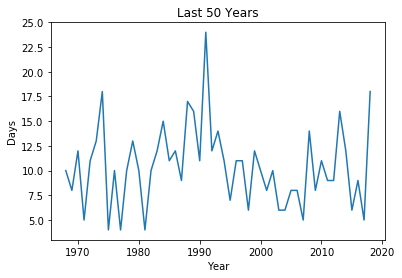

In [23]:
# freezeThaw isn't getting any values here for some reason
freezeThaw = weather[(weather['Maximum Temperature degrees (F)'] >= 36.0)
                     & (weather['Minimum Temperature degrees (F)'] <= 24.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 1967)]
plot0 = freezeThaw.groupby('Year').size().plot()
plot0.set_ylabel('Days')
plot0.set_title("Last 50 Years")

Text(0.5,1,'Loose Definition')

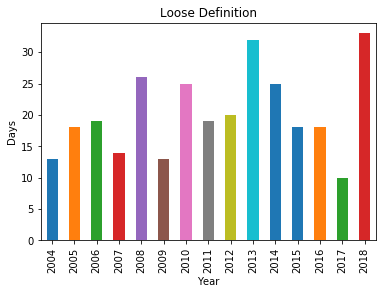

In [24]:
freezeThaw1 = weather[(weather['Maximum Temperature degrees (F)'] >= 34.0)
                     & (weather['Minimum Temperature degrees (F)']<= 30.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 2003)]
plot2 = freezeThaw1.groupby('Year').size().plot(kind="bar")
plot2.set_ylabel('Days')
plot2.set_title('Loose Definition')

Text(0.5,1,'Strict Definition')

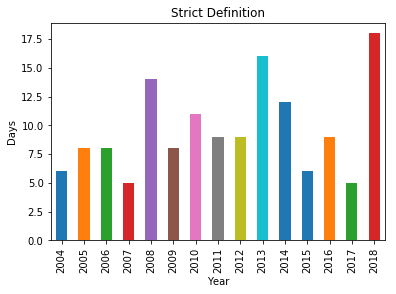

In [25]:
freezeThaw2 = weather[(weather['Maximum Temperature degrees (F)'] >= 36.0)
                     & (weather['Minimum Temperature degrees (F)']<= 24.0)
                     & (weather['Snow Depth (inches)']>=1.0)
                     & (weather.Year > 2003)]
plot3 = freezeThaw2.groupby('Year').size().plot(kind="bar")
plot3.set_ylabel('Days')
plot3.set_title('Strict Definition')

In [18]:
#plot2.figure.savefig(r"loose.png",dpi=300)